# Проверка гипотез по увеличению выручки в интернет-магазине — анализ результатов A/B теста.

Отдел маркетинга подготовил список гипотез для увеличения выручки.

**Цель исследования:**

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи исследования:**

* Подготовить данные к анализу.
* Провести приоритизицию гипотез.
* Рассчитать статистическую значимость.
* Сделать выводы по результатам A/B-теста.

**Исходные данные:**
    
`hypothesis.csv`:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

`orders.csv`:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

`visitors.csv`
* `date` — дата;
* `roup` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста   

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-подготовка-данных" data-toc-modified-id="Обзор-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Таблица-data" data-toc-modified-id="Таблица-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица <code>data</code></a></span></li><li><span><a href="#Таблица-orders" data-toc-modified-id="Таблица-orders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица <code>orders</code></a></span></li><li><span><a href="#Таблица-visitors" data-toc-modified-id="Таблица-visitors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица <code>visitors</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span><ul class="toc-item"><li><span><a href="#Применение-фреймворка-ICE" data-toc-modified-id="Применение-фреймворка-ICE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Применение фреймворка <code>ICE</code></a></span></li><li><span><a href="#Применение-фреймворка-RICE" data-toc-modified-id="Применение-фреймворка-RICE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Применение фреймворка <code>RICE</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#График-кумулятивной-выручки-по-группам." data-toc-modified-id="График-кумулятивной-выручки-по-группам.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>График кумулятивной выручки по группам.</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека-по-группам." data-toc-modified-id="График-кумулятивного-среднего-чека-по-группам.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>График кумулятивного среднего чека по группам.</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A." data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A.</a></span></li><li><span><a href="#График-кумулятивной-конверсии-по-группам." data-toc-modified-id="График-кумулятивной-конверсии-по-группам.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График кумулятивной конверсии по группам.</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A." data-toc-modified-id="График-относительного-изменения-кумулятивной-конверсии-группы-B-к-группе-A.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>График относительного изменения кумулятивной конверсии группы B к группе A.</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям." data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям.</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-количества-заказов-на-пользователя." data-toc-modified-id="95-й-и-99-й-перцентили-количества-заказов-на-пользователя.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>95-й и 99-й перцентили количества заказов на пользователя.</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов." data-toc-modified-id="Точечный-график-стоимостей-заказов.-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Точечный график стоимостей заказов.</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов." data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов.-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов.</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«сырым»-данным." data-toc-modified-id="Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«сырым»-данным.-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Расчет статистической значимости различий в конверсии между группами по «сырым» данным.</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным." data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным.-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«очищенным»-данным." data-toc-modified-id="Расчет-статистической-значимости-различий-в-конверсии-между-группами-по-«очищенным»-данным.-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным." data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным.-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.</a></span></li><li><span><a href="#Решение-по-результатам-теста." data-toc-modified-id="Решение-по-результатам-теста.-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Решение по результатам теста.</a></span></li></ul></li></ul></div>

## Обзор и подготовка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

#для игнорирования предупреждений
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 

In [3]:
#открываем файлы с данными
data = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv', sep=',')
visitors = pd.read_csv('visitors.csv', sep=',') 

### Таблица `data`

In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
#Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

### Таблица `orders`

In [7]:
#общая информация о таблице
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#приводим названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

In [9]:
#смотрим первые строки
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
#Приводим дату к типу datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
#числовое описание данных
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Данные о заказах за август 2019 года. Уникальных значений 31 - заказы совершались каждый день.Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.

In [12]:
#числовое описание данных
orders.describe()

,transactionid,visitorid,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [13]:
#смотрим уникальные значения
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Видим, что группы не одинаковые в группе В пользователей больше.

In [14]:
#проверяем дубликаты
orders.duplicated().sum()

0

### Таблица `visitors`

In [15]:
#общая информация о таблице
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
#Приводим названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

In [17]:
#смотрим первые строки
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
#Приводим дату к типу datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [19]:
#числовое описание данных
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [20]:
#числовое описание данных
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [21]:
#смотрим уникальные значения
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [22]:
#проверяем дубликаты
visitors.duplicated().sum()

0

**Проверим, есть ли кто-то из покупателей сразу в двух группах**

In [23]:
#находим пользователей, которые попали в обе группы
dublicated_users = np.intersect1d(orders
                                  .query('group == "A"')['visitorid']
                                  .unique(), 
                                  orders
                                  .query('group == "B"')['visitorid']
                                  .unique())

#считаем количество этих пользователей
print('Количество пользователей попавших в обе группы:', len(dublicated_users))

Количество пользователей попавших в обе группы: 58


58 пользователей оказались  сразу в обоих группах. Делать с ними ничего не будем, так как их мало, и их удаление никак не скажется на результатах тестов.

### Вывод

На данном этапе мы подготовили данные к анализу. Также проверили, что в данных отсутствуют дубликаты и что тип данных во всех колонках соответствует значениям.

Определили что у нас сеть 58 пользователей у которых заказ попал в обе группы A/B теста, делать с ними ничего не будем, так как их мало, и их удаление никак не скажется на результатах тестов.

В колонке с группами тестирования у нас неравное число участников: в группе А - 557 человек, в группе B - 640.

Все данные корректны - и готовы к анализу.

## Приоритизация гипотез.

### Применение фреймворка `ICE`

In [24]:
#Считаем ICE для гипотез
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']

In [25]:
#смотрим результат
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE:
* "8" - Запустить акцию, дающую скидку на товар в день рождения
* "0" - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
* "7" - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Применение фреймворка `RICE `

In [26]:
#Считаем RICE для гипотез
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

In [27]:
#смотрим результат
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False )

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE:
* "7" - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
* "2" - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* "0" - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Вывод

Мы применила два фреймворка для приоретиризации гипотез `ICE` и `RICE`

Наиболее перспективные гипотезы по `ICE`:
* "8" - Запустить акцию, дающую скидку на товар в день рождения
* "0" - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* "7" - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Для расчета применялись параметpы `impact`, `confidence`, `efforts` (влияние, уверенность, усилия)

Наиболее перспективные гипотезы по `RICE`:
* "7" - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
* "2" - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* "0" - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Для расчета применялись параметpы `reach`, `impact`, `confidence`, `efforts` (охват, влияние, уверенность, усилия)

Такое отличие продиктовано, тем что в фреймворке `RICE` мы учитываем важный параметр - `reach` (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах "7" и "2" он очень высок. В "7" он = 10 - максимальный, а в "2" он = 8,тоже высокий, а в лидере `ICE` - в гипотезе "8" он минимальный = 1. В данном случае побеждает гипотеза "7" 

##  Анализ A/B-теста

### График кумулятивной выручки по группам. 

In [28]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [29]:
#смотрим результат
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Объявим переменную `ordersAggregated`, содержащую: дату, группу A/B-теста, число уникальных заказов в группе теста по указанную дату включительно, число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно, суммарную выручку заказов в группе теста по указанную дату включительно.

In [30]:
# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


Объявим переменную `visitorsAggregated` по аналогии с переменной `ordersAggregated`.



In [31]:
# получаем агрегированные кумулятивные по дням данные о заказах
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Определим переменную `cumulativeData`, объединив `ordersAggregated` и `visitorsAggregated` по колонкам `'date'`, `'group'` методом `merge()`

In [32]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням по группам.

In [33]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

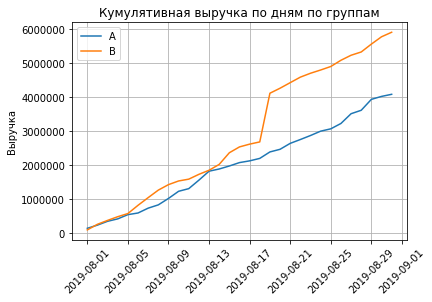

In [34]:
#Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по дням по группам')
plt.ylabel('Выручка')
plt.grid()

plt.legend()
plt.show()

Видим, что выручка почти равномерно увеличивается в течение всего теста в группе `А`. С cамого начала группа `В` пошла вверх, 13 августа выручка обоих групп была примерно одинаковая, далее группа `В` лидировала на протяжении всего теста. Однако  видим резкий скачок выручки после 17 августа в группе `В`, что может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

###  График кумулятивного среднего чека по группам.

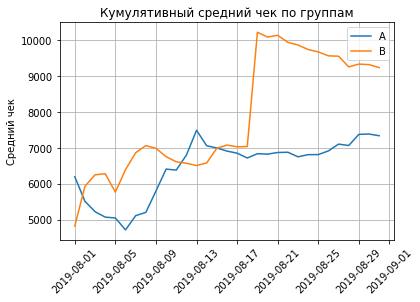

In [35]:
#Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

#Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.grid()

plt.legend()  
plt.show()

Кумулятивное значение среднего чека нестабильно. Видим, что средний чек группы `В` в первой половине месяца преимущественно выше среднего чека группы `А`, но есть и даты когда средний чек группы `А` был выше - это в начале месяца 1 августа и c 12 по 15 августа. После 17 августа  наблюдается резкое увеличение среднего чека группы `В` (такойже скачок был на графике кумулятивной выручки) - вероятно попали крупные заказы,  далее средний чек группы `В` постепенно снижается, в то время как средний чек группы `А` начиная с 25 августа медленно растёт.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

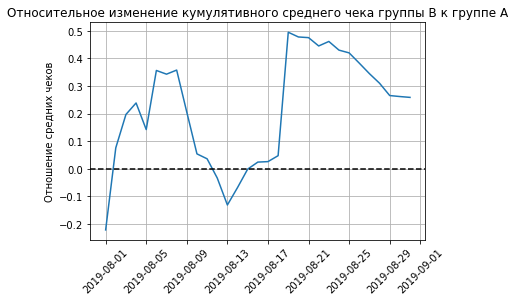

In [36]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение средних чеков')
plt.grid()

plt.show()

В нескольких точках графика разница между сегментами резко скачет. Также как и на предыдущих графикам видим резкий скачок после 17 августа и с 5 по 9 августа. Вероятно, в эти дни были соверешены крупные заказы.

In [37]:
#сортируем данные по стоимости заказа
orders.sort_values(by='revenue', ascending=False).head()

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Видим два аномальных по стоимости значения. Обе транзакции попали в группу `B`. Можно сказать, что именно они и внесли свой «вклад» в искажение общих данных по группе. Теперь стали понятны причины скачка выручки и среднего чека после 17 августа. Это все транзакция на 1,2 млн.

### График кумулятивной конверсии по группам. 

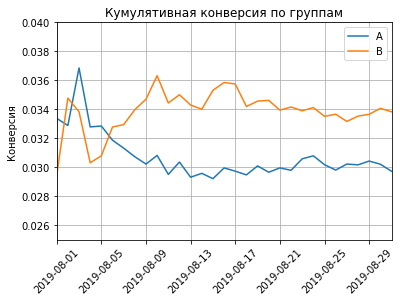

In [38]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.ylabel('Конверсия')
plt.grid()
 
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.025, 0.04])

plt.show()

В начале теста конверсия группы `А` была выше, далее пошла на спад и установилась на значении 0,03. Конверсия группы `В` в начале теста была на уровне 0,03 далее  пошла в рост и установилась на уровне 0,034.

### График относительного изменения кумулятивной конверсии группы B к группе A.

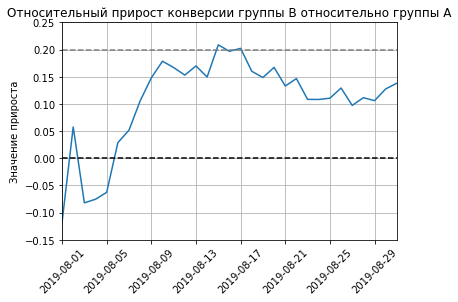

In [39]:
#собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


#строим график относительного различия кумулятивных конверсий
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)

plt.grid()
plt.ylabel('Значение прироста')
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

#добавляем ещё одну линию на оси X серого цвета
plt.axhline(y=0.2, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25])
plt.show()


В начале теста группа B значительно проигрывала группе A потом резко вырвалась вперёд - 2 августа, потом снова упала. После 5 августа вырвалась вперёд и росла до 17 августа, после 17 августа начала падать, но потом начиная с 29 постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

### Точечный график количества заказов по пользователям.

Подсчитаем количество заказов по пользователям — создадим датафрейм c двумя столбцами: `'userId'` и `'orders'`. Назовем его `ordersByUsers`.

In [40]:
#находим количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


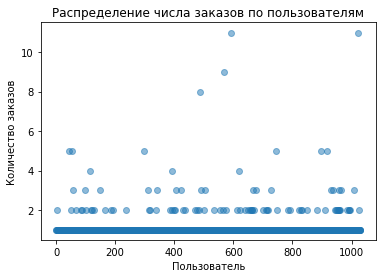

In [41]:
#точечная диаграмма числа заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)

plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')


plt.show()

Большинство пользователей совершают 1 заказ. Пользователей совершивших 2 и более заказов не очень много, но их точная доля не ясна — непонятно, считать их аномалиями или нет. Надо посчитать процентили 95-й и 99-й

###  95-й и 99-й перцентили количества заказов на пользователя.

In [42]:
#счмитаем выборочные перцентили
print('95-й и 99-й перцентили:', np.percentile(ordersByUsers['orders'], [ 95, 99]))

95-й и 99-й перцентили: [2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, все что выше - уже аномалия.

### Точечный график стоимостей заказов.

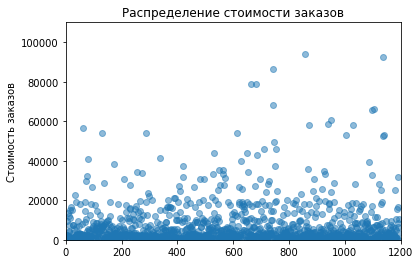

In [43]:
#точечная диаграмма стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5)

plt.title('Распределение стоимости заказов')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1200, 0, 110000])

plt.show()

Основное количество  заказов до 20 000. Не большое количество заказов от 20 000 до 40 000, и еденичные заказы свыше 40 000. Надо посчитать процентили 95-й и 99-й

###  95-й и 99-й перцентили стоимости заказов.

In [44]:
print('95-й и 99-й перцентили:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили: [28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 000. И не больше, чем у 1% заказов чек дороже 58 233 т.р. За нижнюю границу стоимости заказов возмем стоимсоть в 28 000,  всё что  выше - аномалия.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

Соберем все данные по заказам и визитам, а также добавим кумулятивные показатели, в одну таблицу. Для этого создадим несколько таблиц и затем объединим их.

In [45]:
#Количество посетителей по дням для руппы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Накопленное количество посетителей по дням для группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [46]:
#Количество посетителей по дням для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#Накопленное количество посетителей по дням для группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [47]:
#Количество заказов по дням для руппы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#Накопленное количество заказов по дням для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


In [48]:
#Количество заказов по дням для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Накопленное количество заказов по дням для группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [49]:
#Объединяем по дате все полученные кумулятивные данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [50]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [52]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() 
                                                           - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() 
                                                           - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы:
* Ho - статистически значимых различий в конверсии между группами нет.
* H1 - статистически значимые различия есть.

Пороговое значение alpha примем за 5%.

In [53]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительный прирост группы B к A = {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный прирост группы B к A = 0.138


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы А равен 13%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сравним средние чеки по "сырым" данным.
Сформулируем гипотезы:
* Но - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы
* Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.


In [54]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))     

alpha = 0.05
p-value = 0.729
Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A на 26%

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. 

При расчетах 95-го и 99-го перцентелей, решили принять за аномальные значения  тех кто совершил больше 2 заказов и тех кто совершил заказ на сумму свыше 28 000. 

Узнаем, сколько всего аномальных пользователей методом shape().

In [55]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
(74,)


74 аномальных пользователя.  После их удаления можно считать статистическую значимость

Сформулируем гипотезы:
* Но - различия в конверсии между группами по «очищенным» данным статистически не значимы
* Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.

Создадим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [56]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

In [57]:
print('alpha =',0.05)
print('P-value по конверсии после очистки данных = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост конверсии группы B к конверсии группы А после очистки данных: = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
P-value по конверсии после очистки данных = 0.013
Относительный прирост конверсии группы B к конверсии группы А после очистки данных: = 0.173


Как и в случае с сырыми данными, статистическая значимость достигнута. p-value = 0.01, что меньше 0.05 - значит отвергаем нулевую гипотезу. Группа `B` лучше группы `А`. Относительный прирост конверсии очищенной группы `B` к `А` увеличился и равен 17,3%, по сырым данным  было - 13,8%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

Сформулируем гипотезы:

* Но - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы
* Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.


In [58]:
print("alpha =",0.05)
print("P-value по среднему чеку после очистки данных: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных:{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
P-value по среднему чеку после очистки данных: 0.738
Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных:-0.020


Статистической значимости различия между средними чеками не появилось. P-value увеличился до 0.738, а разница между сегментами стала -0.02.

### Решение по результатам теста. 

Исходя из проведеного анализа, можно принять решение остановить тест и выбрать победителем  группу `B` так как:

* По "сырым" и по "очищенным" данным различия в конверсии групп `A` и `B` есть. Относительный выигрыш группы `B` над `A` равен 17,3% по "очищенным" и 13.8% по "сырым" данным.
* по "сырым" и по "очищенным" данным различия в средних чеках групп `A` и `B` отстутствуют, несмотря на то, что средний чек группы `B` оказался незначительно (на 2%) ниже среднего чека группы `A` по "очищенным" данным, в то время как по "сырым" данным, он был больше на 26%, - и всё это из-за одного того  аномального заказа  на 1,2 млн. 

Группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.